In [1]:
import torch
import numpy as np
import torch.nn as nn
import pandas as pd

In [2]:
data = pd.read_csv('data/trainData.csv')
data.head()

,PassengerId,Cabin,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP,CryoSleep,Deck,Room,Info,Transported
0,0001_01,B/0/P,2,1,39.0,0,0,0,0,0,0,0,2,0,1,0
1,0002_01,F/0/S,1,1,24.0,109,9,25,549,44,0,0,6,0,2,1
2,0003_01,A/0/S,2,1,58.0,43,3576,0,6715,49,1,0,1,0,2,0
3,0003_02,A/0/S,2,1,33.0,0,1283,371,3329,193,0,0,1,0,2,0
4,0004_01,F/1/S,1,1,16.0,303,70,151,565,2,0,0,6,1,2,1


In [3]:
features = ['HomePlanet', 'Destination', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'VIP', 'CryoSleep', 'Deck', 'Room', 'Info']
X = data[features]

X.head()

,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP,CryoSleep,Deck,Room,Info
0,2,1,39.0,0,0,0,0,0,0,0,2,0,1
1,1,1,24.0,109,9,25,549,44,0,0,6,0,2
2,2,1,58.0,43,3576,0,6715,49,1,0,1,0,2
3,2,1,33.0,0,1283,371,3329,193,0,0,1,0,2
4,1,1,16.0,303,70,151,565,2,0,0,6,1,2


In [4]:
Y = data['Transported']
Y = Y.to_numpy()

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

In [7]:
X.shape, Y.shape

(torch.Size([7950, 13]), torch.Size([7950]))

In [8]:
# 制作torch dataset, 3:7划分训练集和验证集
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X, Y)

train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [9]:
model = nn.Sequential(
    nn.Linear(13, 20),
    nn.ReLU(),
    nn.Linear(20, 64),
    nn.ReLU(),
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# 定义损失函数
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.008)

In [10]:
import matplotlib.pyplot as plt

In [11]:
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = loss_fn(output, Y_batch.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            output = model(X_batch)
            loss = loss_fn(output, Y_batch.view(-1, 1))
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f'Epoch {epoch + 1}/{epochs}, train_loss: {train_loss}, val_loss: {val_loss}')

Epoch 1/100, train_loss: 0.49882055459351377, val_loss: 0.42090221444765724
Epoch 2/100, train_loss: 0.44022888039377917, val_loss: 0.42044355273246764
Epoch 3/100, train_loss: 0.42811929032035256, val_loss: 0.42926361441612243
Epoch 4/100, train_loss: 0.41857485224803287, val_loss: 0.4208203947544098
Epoch 5/100, train_loss: 0.4161191523588937, val_loss: 0.41538536866505943
Epoch 6/100, train_loss: 0.4104143949760788, val_loss: 0.41718959748744966
Epoch 7/100, train_loss: 0.41289990326796455, val_loss: 0.42344319899876914
Epoch 8/100, train_loss: 0.40756625639296123, val_loss: 0.4088041365146637
Epoch 9/100, train_loss: 0.4048832171949847, val_loss: 0.4206808974345525
Epoch 10/100, train_loss: 0.403143624978504, val_loss: 0.42103182395299277
Epoch 11/100, train_loss: 0.4019465893507004, val_loss: 0.3992328635851542
Epoch 12/100, train_loss: 0.3951200917363167, val_loss: 0.4239328358570735
Epoch 13/100, train_loss: 0.3915896545025124, val_loss: 0.4032412785291672
Epoch 14/100, train_lo

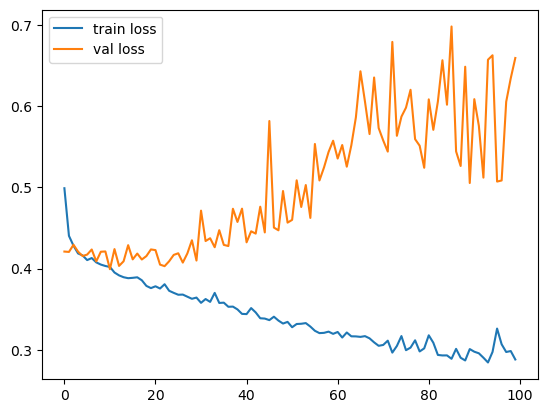

In [13]:
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.legend()
plt.show()